In [3]:
!gdown --id 1Eq0s7oBP00xkPkAAlBt0nj6lNVFvMkhO

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Eq0s7oBP00xkPkAAlBt0nj6lNVFvMkhO
To: /content/Precooked_pasta.csv
100% 30.8M/30.8M [00:00<00:00, 31.6MB/s]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [5]:
df = pd.read_csv("/content/Precooked_pasta.csv")
df

,Sample_ID,Dry_weight_content_%,Pasta_type_&_phy_con,Phy_con,Pasta_type,350,351,352,353,354,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.273476,0.274664,0.276380,0.278252,0.278817,...,0.029975,0.030175,0.030159,0.029962,0.029791,0.029484,0.029472,0.029682,0.029583,0.029580
1,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.264637,0.265435,0.264751,0.266426,0.266870,...,0.048597,0.048674,0.048668,0.048763,0.048775,0.048688,0.048645,0.048607,0.048330,0.048190
2,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.169046,0.167434,0.169058,0.171890,0.176521,...,0.022955,0.023029,0.023051,0.023055,0.023036,0.023008,0.022918,0.022691,0.022503,0.022539
3,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.251627,0.251486,0.259051,0.262979,0.259674,...,0.040048,0.040046,0.040003,0.039815,0.039703,0.039671,0.039672,0.039642,0.039595,0.039484
4,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.161285,0.164613,0.169598,0.167259,0.168154,...,0.052392,0.052348,0.052389,0.052460,0.052475,0.052550,0.052569,0.052479,0.052492,0.052476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.123408,0.119177,0.113905,0.116624,0.121210,...,0.045335,0.045403,0.045501,0.045496,0.045537,0.045849,0.045793,0.045396,0.045128,0.045112
1196,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.125699,0.121910,0.118119,0.118316,0.117574,...,0.043958,0.043743,0.043659,0.043489,0.043563,0.043944,0.044031,0.044185,0.044124,0.043869
1197,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.113928,0.116862,0.119997,0.113773,0.117905,...,0.045205,0.045057,0.045030,0.044883,0.044854,0.045042,0.045063,0.045013,0.044990,0.045082
1198,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.130362,0.127501,0.128886,0.131551,0.130019,...,0.046510,0.046244,0.046220,0.046381,0.046408,0.046421,0.046486,0.046521,0.046554,0.046563


In [116]:
spectra = df.values[:,5:]
classes = df.values[:,0:1]

In [117]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()
# Thực hiện mã hóa nhãn
encoded_classes = label_encoder.fit_transform(classes)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.preprocessing import OneHotEncoder

# Khởi tạo bộ mã hóa OneHotEncoder
encoder = OneHotEncoder(categories='auto')

# Thực hiện one-hot encoding
encoded_classes = encoder.fit_transform(encoded_classes.reshape(-1, 1)).toarray()

# In one-hot encoding
print(encoded_classes)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [118]:
def linear_interpolation(matrix, new_width):
    old_height, old_width = matrix.shape
    ratio = old_width / new_width
    new_matrix = np.zeros((old_height, new_width))
    for i in range(old_height):
        indices = (np.arange(new_width) * ratio).astype(int)
        new_matrix[i] = matrix[i, indices]
    return new_matrix

new_spectra = linear_interpolation(spectra,3072)

In [119]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(spectra, encoded_classes, test_size=0.3, random_state=2)

In [120]:
import tensorflow as tf

X_train = X_train.astype(float)
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

X_test = X_test.astype(float)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

In [121]:
print(X_train.shape)
print(y_train.shape)

(840, 2151)
(840,)


In [122]:
def extract_to_pseudo_image(matrix):
  extract_matrix = matrix.astype(float)
  extract_matrix = tf.convert_to_tensor(extract_matrix)
  extract_matrix = tf.reshape(extract_matrix, (extract_matrix.shape[0],32, 32, 3))
  return extract_matrix

In [123]:
X_train, X_test, y_train, y_test = train_test_split(new_spectra, encoded_classes, test_size=0.3, random_state=2)

In [124]:
X_train = extract_to_pseudo_image(X_train)
X_test = extract_to_pseudo_image(X_test)

In [125]:
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [126]:
print(X_train.shape)
print(y_train.shape)

(840, 32, 32, 3)
(840,)


In [127]:
X_train[0][:,:,:].shape

TensorShape([32, 32, 3])

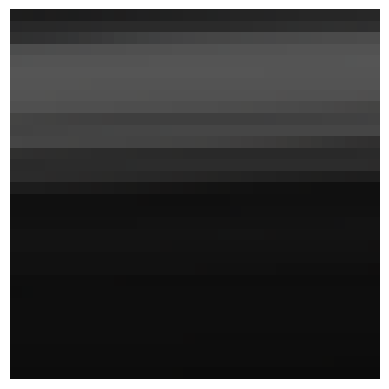

In [128]:

# Hiển thị hình ảnh từ tensor
plt.imshow(X_train[0][:,:,:])
plt.axis('off')
plt.show()

In [129]:
model = tf.keras.applications.VGG16(input_shape=(32,32,3),
                                               include_top=False,
                                               weights='imagenet')

In [130]:
X_train_feature = model.predict(X_train)
X_test_feature = model.predict(X_test)


12/12 [==============================] - 0s 6ms/step


In [131]:
X_train_feature = tf.reshape(X_train_feature , (X_train_feature.shape[0],512))
X_test_feature = tf.reshape(X_test_feature , (X_test_feature.shape[0],512))

In [132]:
X_train_feature = X_train_feature.numpy()
X_test_feature = X_test_feature.numpy()

In [133]:
print(X_train_feature.shape)
print(X_test_feature.shape)

(840, 512)
(360, 512)


In [135]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Khởi tạo mô hình SVM
model = svm.SVC(kernel='linear')
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train_feature, y_train)
# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test_feature)

# Đánh giá độ chính xác của mô hình
y_pred

array([20, 12,  0, 20,  0, 23,  7, 20, 22, 20,  0, 12, 11,  9,  9,  4,  3,
       20, 10, 12,  7, 13, 10, 19,  0,  1,  0, 21,  4,  3, 23,  6, 23,  3,
        9,  6, 14, 23,  9, 14, 10, 14,  9, 14, 20,  7, 19, 14,  4,  3,  3,
       23,  6,  9,  3, 17,  7,  3,  0,  9, 19, 12,  8,  2, 23, 20,  1, 10,
        4,  6,  0,  3, 14,  6,  4, 14,  0,  0,  7, 17, 20, 20, 23,  2,  1,
        3, 10,  9,  9,  3,  0,  4,  8,  0,  0, 23, 17, 20, 20,  0,  0,  8,
        6,  4, 10,  3,  1,  0,  0,  0,  4,  4,  2,  9,  4,  7,  9,  3, 14,
        2,  4, 23,  7, 10,  0,  9,  3, 20, 12, 20,  3,  9,  0, 12, 19, 14,
        7,  4,  9, 17,  7,  9, 12,  9,  4, 12, 23,  0,  6,  6,  9,  7, 23,
       19,  0,  4,  7, 20, 12,  4, 12,  6, 20,  0,  3, 23,  9,  7,  9, 20,
        2,  4, 20,  4,  9,  2,  0, 12, 17,  6, 17,  7,  2, 14,  0,  0, 10,
        2,  0, 20,  4,  9,  0,  4, 14,  4, 21,  9,  0, 14, 17,  0,  0, 20,
        6,  7,  0,  7,  9,  9, 14,  7, 12, 23,  0,  0, 13,  2, 14, 10,  7,
        7, 10,  3,  7, 19

In [137]:
y_pred - y_test

<tf.Tensor: shape=(360,), dtype=int64, numpy=
array([  0,  -3,  -1,   2,  -1,   0,   0,   0,  14,   2,  -2,   7,   0,
        -9,   0,  -1,  -2,   2,   2,   0, -16,  -2,   4,   0,  -3,   0,
       -14,   8,   0,   3,  12,  -2,   1, -13,   2, -15,  -1,   1, -10,
        -3,  -9,   1,   3,   1,  -1,   0,   0,  -1,  -8, -11, -10,  12,
       -15,   3,  -2,   5,  -1,   0, -15, -12,   8,  -3, -13,  -2,   0,
         0, -15,   2, -10, -12, -13, -13,  -2, -15, -10,   0,   0, -16,
       -11,   4,  10,   2,   1,   1,   0, -14,   0,  -9,   2,   2, -17,
        -8, -11, -17,  -1,   0,  13,  10,   0, -17, -17,   0, -13,  -1,
         4, -10,   0,   0,  -3,  -3,  -9,   0,  -2, -10,  -1,  -4,  -1,
         1,  12,  -3,   0,   1,  -1,   4, -12, -12,   1,  -1,   0,   2,
        -2,   2,  -2,   0,   8,  -2,  -2,   0,   0,   2,  -2,  -1,  -2,
         2,   4,  -4,  16,  -2,  -2,  -2,  -1,   0,   0,   0,  -2, -13,
         0,  -1,  -3,  -1,  -3,   0,   0,  -3, -10,   0,   2,   0,   3,
         0,   2,  